In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
num_col = df.select_dtypes(include=[np.number]).columns
non_num_col = df.select_dtypes(exclude=[np.number]).columns

In [6]:
df[num_col] = df[num_col].fillna(df[num_col].mean())

In [8]:
label_encoder = LabelEncoder()
for column in non_num_col:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

In [9]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = df[features]
scaler = StandardScaler() # Scale numerical features
x_scaled = scaler.fit_transform(x)
sse = [] # Optimal number of clusters using elbow method
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scaled)
    sse.append(km.inertia_)

C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

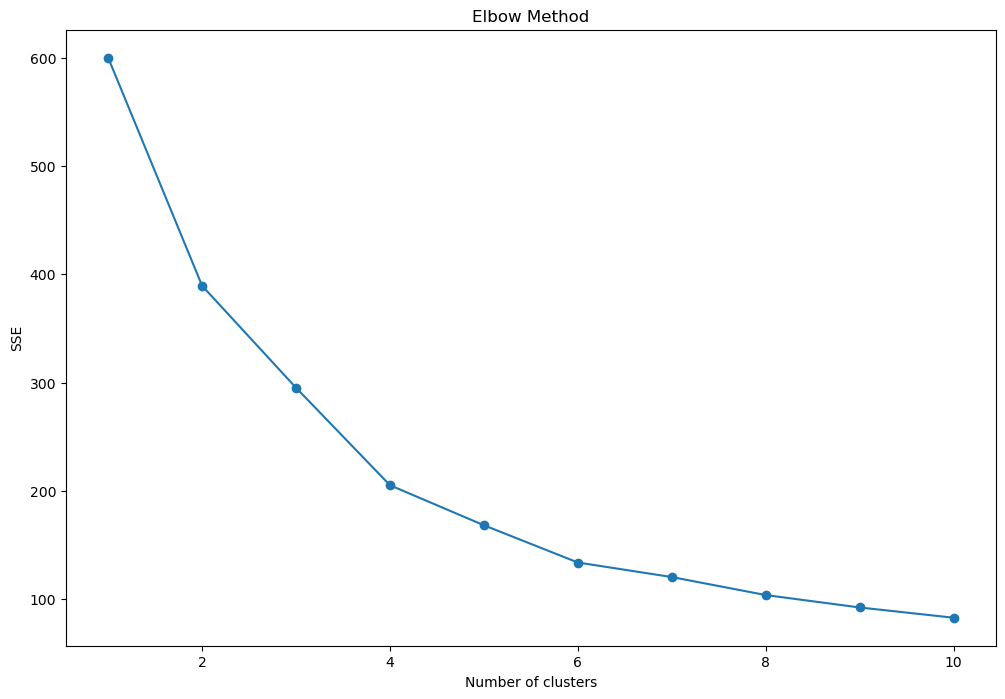

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11),sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [11]:
sil_score = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scaled)
    sil_score.append(silhouette_score(x_scaled, km.labels_))

C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

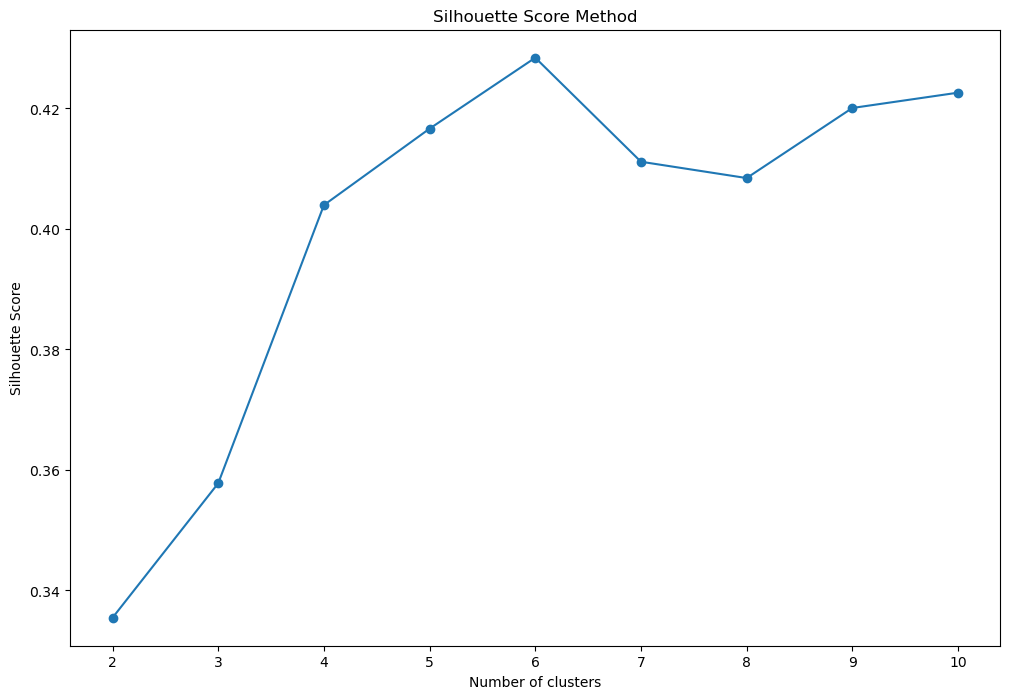

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11),sil_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [13]:
opt_k = 5
km = KMeans(n_clusters=opt_k, random_state=42)
df['Cluster'] = km.fit_predict(x_scaled)

C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


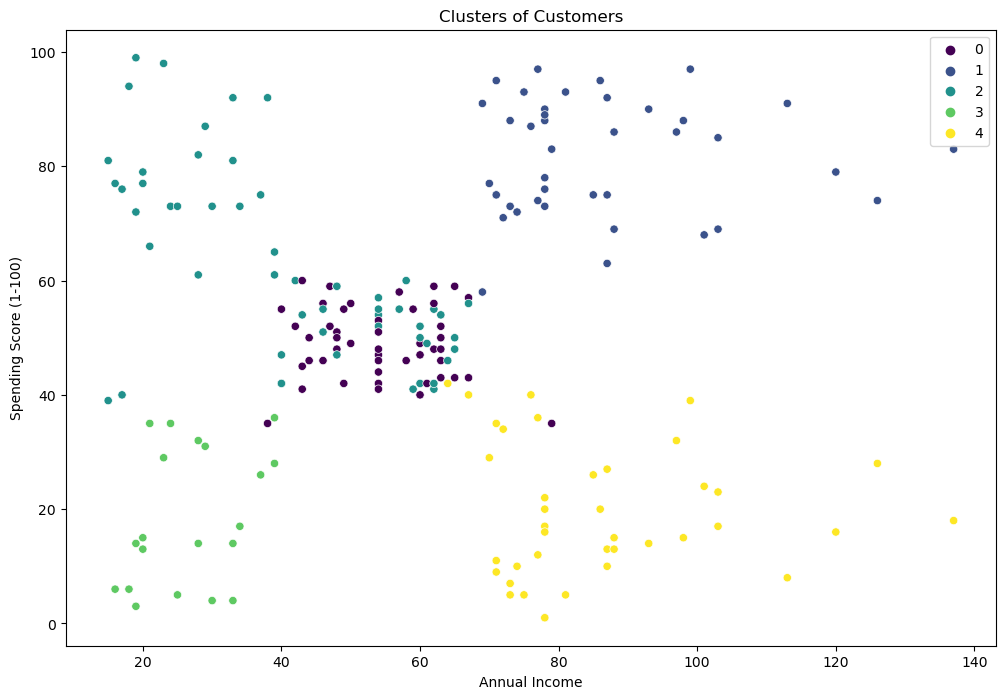

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

In [19]:
cluster_centers = scaler.inverse_transform(km.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(opt_k)

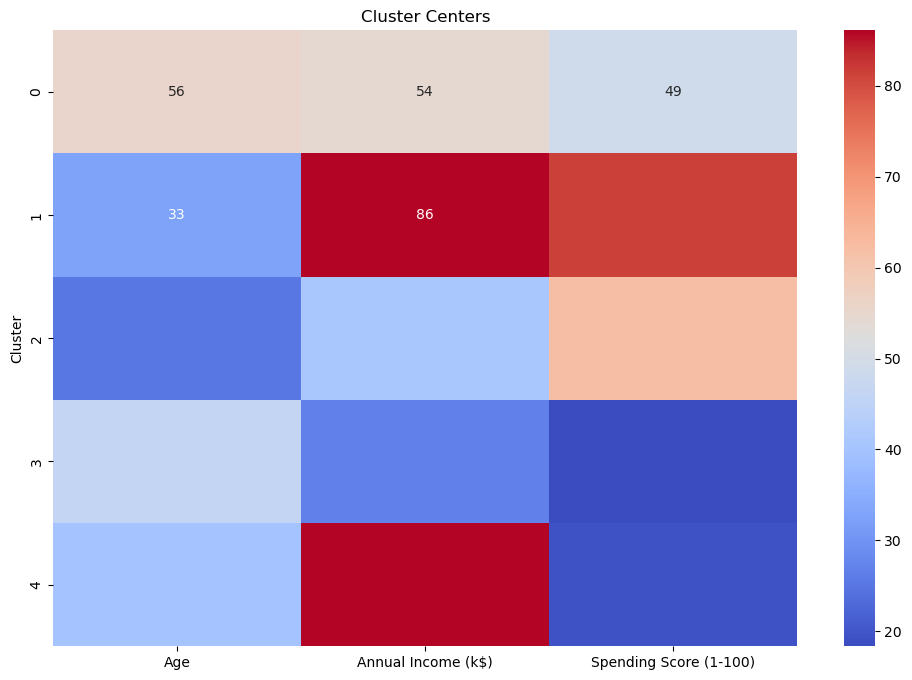

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers')
plt.show()

C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


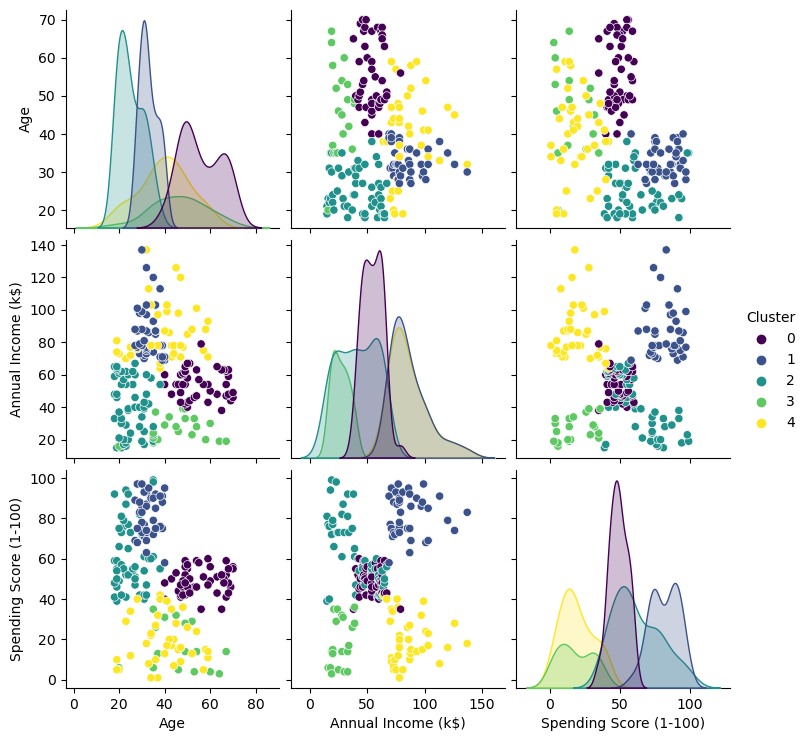

In [23]:
sns.pairplot(df, hue='Cluster', palette='viridis', vars=features)
plt.show()

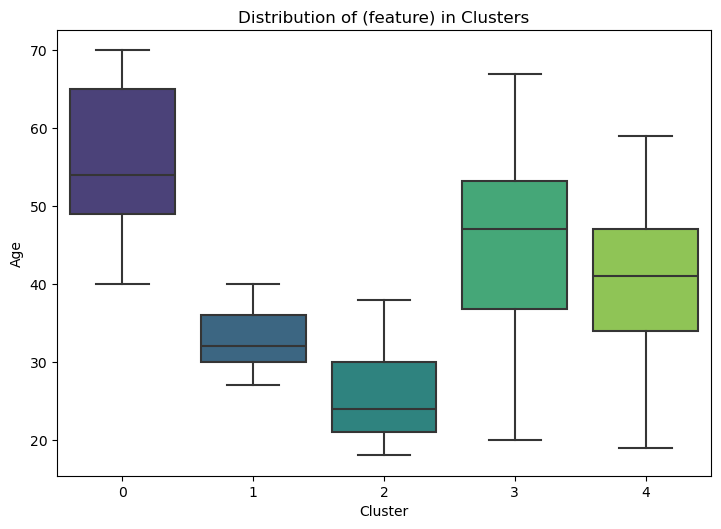

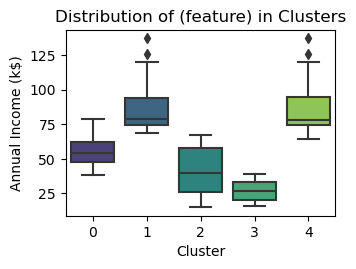

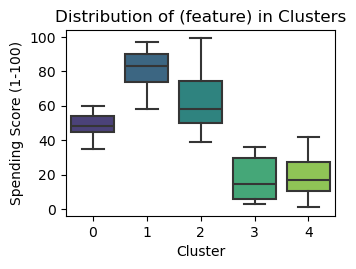

In [26]:
plt.figure(figsize=(14,10))
for i, feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of (feature) in Clusters')
    plt.tight_layout()
    plt.show()

In [28]:
cluster_sum = df.groupby('Cluster')[features].mean().reset_index()
print(cluster_sum)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  55.638298           54.382979               48.851064
1        1  32.875000           86.100000               81.525000
2        2  25.185185           41.092593               62.240741
3        3  46.250000           26.750000               18.350000
4        4  39.871795           86.102564               19.358974
